<a href="https://colab.research.google.com/github/manas390/PRODIGY_ML_01/blob/main/House_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [36]:
def fill_null(df):
    for i in df:
        if df[i].isna().any():
            if df[i].dtype != 'O':
                mean = df[i].mean()
                df[i] = df[i].fillna(mean)
                print(f'{i} has null values and it is a {df[i].dtype} type. It will be filled with the value of the average')
            elif df[i].dtype == 'O':
                df[i] = df[i].fillna('U')
                print(f'{i} has null values and it is a {df[i].dtype} type. It will be filled with the letter U')
    return df.copy()

In [37]:
def ordinal_encoder_df(df):
    for i in df:
        if df[i].dtype == 'O':
            data = df[[i]]
            ordinal = OrdinalEncoder()
            df[i] = ordinal.fit_transform(data)
            print("\rCoding labels: {0} categories {1}".format(i, ordinal.categories_), end='')
    return df.copy()

In [38]:
def remove_lables(df, label):
    x = df.drop(label, axis=1)
    y = df[label].copy()
    return (x, y)

In [39]:
train_data = pd.read_csv("/content/train.csv", index_col=0)

In [40]:
train_data = fill_null(train_data)

LotFrontage has null values and it is a float64 type. It will be filled with the value of the average
Alley has null values and it is a object type. It will be filled with the letter U
MasVnrType has null values and it is a object type. It will be filled with the letter U
MasVnrArea has null values and it is a float64 type. It will be filled with the value of the average
BsmtQual has null values and it is a object type. It will be filled with the letter U
BsmtCond has null values and it is a object type. It will be filled with the letter U
BsmtExposure has null values and it is a object type. It will be filled with the letter U
BsmtFinType1 has null values and it is a object type. It will be filled with the letter U
BsmtFinType2 has null values and it is a object type. It will be filled with the letter U
Electrical has null values and it is a object type. It will be filled with the letter U
FireplaceQu has null values and it is a object type. It will be filled with the letter U
GarageT

In [41]:
for i in train_data:
    if train_data[i].isna().any():
        print(f'{i} has null values and it is a {train_data[i].dtype} type.')

In [42]:
train_data = ordinal_encoder_df(train_data)

Coding labels: Neighborhood categories [array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
Coding labels: Condition1 categories [array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
Coding labels: Condition2 categories [array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
Coding labels: HouseStyle categories [array(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story',
Coding labels: RoofMatl categories [array(['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv',
Coding labels: Exterior1st categories [array(['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd',
       'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 'Stone', 'Stucco',
Coding labels: Exterior2nd categories [array(['AsbShng', 'Asph

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   float64
 5   Alley          1460 non-null   float64
 6   LotShape       1460 non-null   float64
 7   LandContour    1460 non-null   float64
 8   Utilities      1460 non-null   float64
 9   LotConfig      1460 non-null   float64
 10  LandSlope      1460 non-null   float64
 11  Neighborhood   1460 non-null   float64
 12  Condition1     1460 non-null   float64
 13  Condition2     1460 non-null   float64
 14  BldgType       1460 non-null   float64
 15  HouseStyle     1460 non-null   float64
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [44]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3.0,65.0,8450,1.0,2.0,3.0,3.0,0.0,4.0,...,0,3.0,4.0,4.0,0,2,2008,8.0,4.0,208500
2,20,3.0,80.0,9600,1.0,2.0,3.0,3.0,0.0,2.0,...,0,3.0,4.0,4.0,0,5,2007,8.0,4.0,181500
3,60,3.0,68.0,11250,1.0,2.0,0.0,3.0,0.0,4.0,...,0,3.0,4.0,4.0,0,9,2008,8.0,4.0,223500
4,70,3.0,60.0,9550,1.0,2.0,0.0,3.0,0.0,0.0,...,0,3.0,4.0,4.0,0,2,2006,8.0,0.0,140000
5,60,3.0,84.0,14260,1.0,2.0,0.0,3.0,0.0,2.0,...,0,3.0,4.0,4.0,0,12,2008,8.0,4.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,3.0,62.0,7917,1.0,2.0,3.0,3.0,0.0,4.0,...,0,3.0,4.0,4.0,0,8,2007,8.0,4.0,175000
1457,20,3.0,85.0,13175,1.0,2.0,3.0,3.0,0.0,4.0,...,0,3.0,2.0,4.0,0,2,2010,8.0,4.0,210000
1458,70,3.0,66.0,9042,1.0,2.0,3.0,3.0,0.0,4.0,...,0,3.0,0.0,2.0,2500,5,2010,8.0,4.0,266500


In [45]:
numeric = train_data.select_dtypes(include=[np.number])
corr = numeric.corr()

In [46]:
max_corr = corr[corr < 1].dropna(axis=1)
max_corr


""
MSSubClass
MSZoning
LotFrontage
LotArea
Street
...
MoSold
YrSold
SaleType
SaleCondition


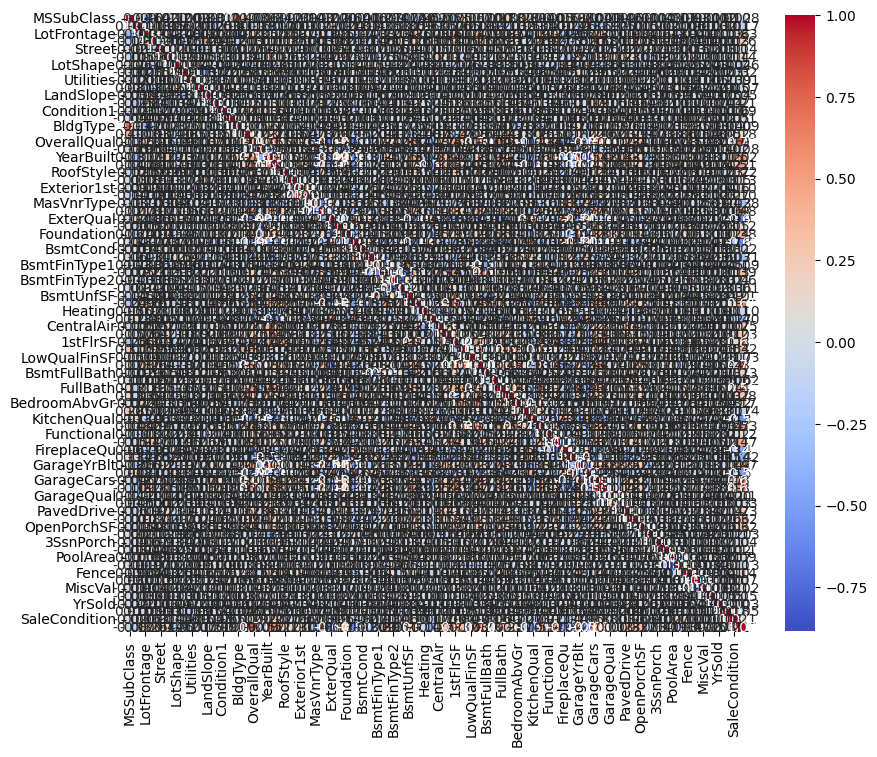

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [48]:
train_set, val_set = train_test_split(train_data, test_size=0.1, random_state=42, shuffle=True, stratify=None)


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'MSZoning'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'Street'}>,
        <Axes: title={'center': 'Alley'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>,
        <Axes: title={'center': 'Utilities'}>],
       [<Axes: title={'center': 'LotConfig'}>,
        <Axes: title={'center': 'LandSlope'}>,
        <Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'Condition1'}>,
        <Axes: title={'center': 'Condition2'}>,
        <Axes: title={'center': 'BldgType'}>,
        <Axes: title={'center': 'HouseStyle'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'RoofStyle'}>,
     

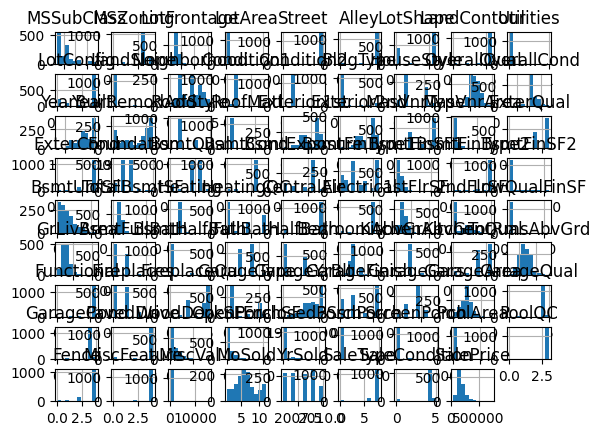

In [49]:
train_set.hist()


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'MSZoning'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'Street'}>,
        <Axes: title={'center': 'Alley'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>,
        <Axes: title={'center': 'Utilities'}>],
       [<Axes: title={'center': 'LotConfig'}>,
        <Axes: title={'center': 'LandSlope'}>,
        <Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'Condition1'}>,
        <Axes: title={'center': 'Condition2'}>,
        <Axes: title={'center': 'BldgType'}>,
        <Axes: title={'center': 'HouseStyle'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'RoofStyle'}>,
     

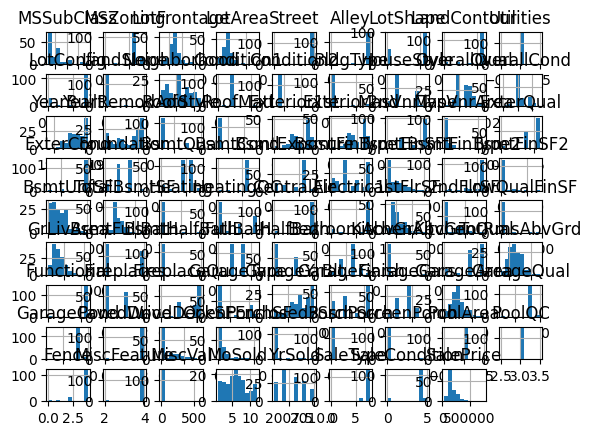

In [50]:
val_set.hist()

In [51]:
x_train, y_train = remove_lables(train_set, "SalePrice")
x_val, y_val = remove_lables(val_set, "SalePrice")


In [52]:
y_val


Id
893     154500
1106    325000
414     115000
523     159000
1037    315500
         ...  
527     132000
102     178000
1093    136500
412     145000
1393    123000
Name: SalePrice, Length: 146, dtype: int64

In [53]:
clf_rnd = RandomForestRegressor(n_estimators=650, random_state=42)
clf_rnd.fit(x_train, y_train)

RandomForestRegressor(n_estimators=650, random_state=42)

In [54]:
y_pred = clf_rnd.predict(x_val)

In [55]:
y_val.iloc[0]

154500

In [56]:
y_val

Id
893     154500
1106    325000
414     115000
523     159000
1037    315500
         ...  
527     132000
102     178000
1093    136500
412     145000
1393    123000
Name: SalePrice, Length: 146, dtype: int64

In [57]:
test_data = pd.read_csv("/content/test.csv", index_col=0)

In [58]:
test_data.isna().any()

MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
Street           False
                 ...  
MiscVal          False
MoSold           False
YrSold           False
SaleType          True
SaleCondition    False
Length: 79, dtype: bool

In [59]:
test_data = fill_null(test_data)

MSZoning has null values and it is a object type. It will be filled with the letter U
LotFrontage has null values and it is a float64 type. It will be filled with the value of the average
Alley has null values and it is a object type. It will be filled with the letter U
Utilities has null values and it is a object type. It will be filled with the letter U
Exterior1st has null values and it is a object type. It will be filled with the letter U
Exterior2nd has null values and it is a object type. It will be filled with the letter U
MasVnrType has null values and it is a object type. It will be filled with the letter U
MasVnrArea has null values and it is a float64 type. It will be filled with the value of the average
BsmtQual has null values and it is a object type. It will be filled with the letter U
BsmtCond has null values and it is a object type. It will be filled with the letter U
BsmtExposure has null values and it is a object type. It will be filled with the letter U
BsmtFinType1 

In [60]:
test_data = ordinal_encoder_df(test_data)

Coding labels: Neighborhood categories [array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
Coding labels: Condition1 categories [array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
Coding labels: HouseStyle categories [array(['1.5Fin', '1.5Unf', '1Story', '2.5Unf', '2Story', 'SFoyer', 'SLvl'],
Coding labels: Exterior1st categories [array(['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd',
       'HdBoard', 'MetalSd', 'Plywood', 'Stucco', 'U', 'VinylSd',
Coding labels: Exterior2nd categories [array(['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', 'CmentBd',
       'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 'Stone', 'Stucco', 'U',
Coding labels: Functional categories [array(['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev

In [61]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,2.0,80.0,11622,1.0,2.0,3.0,3.0,0.0,4.0,...,120,0,2.0,2.0,3.0,0,6,2010,9.0,4.0
1462,20,3.0,81.0,14267,1.0,2.0,0.0,3.0,0.0,0.0,...,0,0,2.0,4.0,0.0,12500,6,2010,9.0,4.0
1463,60,3.0,74.0,13830,1.0,2.0,0.0,3.0,0.0,4.0,...,0,0,2.0,2.0,3.0,0,3,2010,9.0,4.0
1464,60,3.0,78.0,9978,1.0,2.0,0.0,3.0,0.0,4.0,...,0,0,2.0,4.0,3.0,0,6,2010,9.0,4.0
1465,120,3.0,43.0,5005,1.0,2.0,0.0,1.0,0.0,4.0,...,144,0,2.0,4.0,3.0,0,1,2010,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,4.0,21.0,1936,1.0,2.0,3.0,3.0,0.0,4.0,...,0,0,2.0,4.0,3.0,0,6,2006,9.0,4.0
2916,160,4.0,21.0,1894,1.0,2.0,3.0,3.0,0.0,4.0,...,0,0,2.0,4.0,3.0,0,4,2006,9.0,0.0
2917,20,3.0,160.0,20000,1.0,2.0,3.0,3.0,0.0,4.0,...,0,0,2.0,4.0,3.0,0,9,2006,9.0,0.0


In [62]:
y_pred = clf_rnd.predict(test_data)

In [63]:
y_pred[:7]

array([126353.41230769, 155162.81846154, 179682.44      , 182026.40307692,
       197719.74461538, 183904.33538462, 171248.44461538])

In [64]:
test_data.index

Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
       ...
       2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
      dtype='int64', name='Id', length=1459)

In [65]:
submission = pd.DataFrame({'Id': test_data.index, 'SalePrice': y_pred})

In [66]:
submission

,Id,SalePrice
0,1461,126353.412308
1,1462,155162.818462
2,1463,179682.440000
3,1464,182026.403077
4,1465,197719.744615
...,...,...
1454,2915,83379.410769
1455,2916,84512.360000
1456,2917,154091.227692
1457,2918,119146.621538


In [67]:
submission.to_csv("/content/sample_submission.csv", index=False)